In [3]:
%run "../../PyUtils/common.ipynb"
import pymc3 as pymc3
from pymc3 import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
h='<iframe src="Examples/Vision Research.htm" width=100% height="600"></iframe>'
display(HTML(h))
file="Examples/Vision Research.xlsx"
df2 = LoadDataSet(file, sheetname=2);
df2.fillna('', inplace=True)
df2.index = range(len(df2))

In [40]:
c=0.5
g = stats.triang.stats(c, moments='m')


In [41]:
def netProfit():
    return 300

devCost = 10

with pymc3.Model() as mcmc:
    tCost = pymc3.Uniform('Testing Costs', 3, 5)
    opcost = Triangular('Marketing Cost',lower=.12, upper=.18, c = .5 )
    #opcost = Triangular('N' )
    totalCost = "devCost + tCost + opCost"
    
    ROI = Deterministic('ROI', netProfit() )
    #traced = sample(1000)


TypeError: Variables do not support boolean operations. This can happen if you do a logical operation (<, <=, >, <=, ==, !=) between a numpy.ndarray and a Theano tensorvariable. Due to NumPy implementation before NumPy 1.8, we cannot make the Python syntax work when the ndarray is on the left, and this results in this error. To work around that, either call theano.tensor.{lt,le,eq,ne,gt,ge}(ndarray, tensor), or use the Python syntax with the Theano tensor on the left. Or update to NumPy 1.8 or above.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2590.49848932 1838.79962867
2590.49848932 1838.79962867


0.92055264717714058

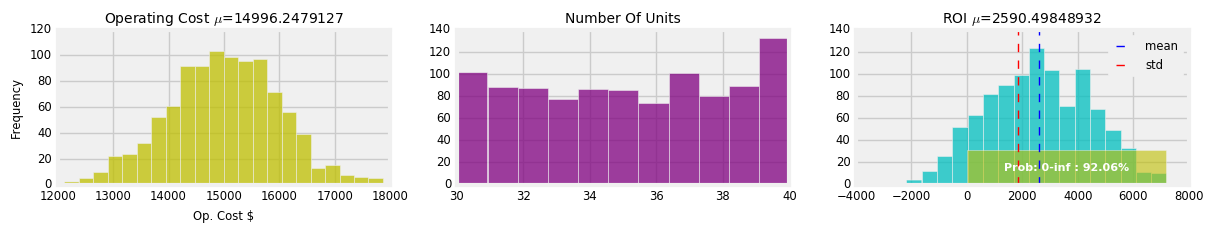

In [69]:
from numpy import median

plt.figure(figsize=(13,2))
mn = np.mean(traced['Operating Cost'])
plthist(traced['Operating Cost'], title='Operating Cost $\mu$='+ str(mn), ylabel='Frequency', xlabel='Op. Cost $', facecolor='y', subplot=131);
#n1 = [norm(15000, 1000).rvs() for i in range(1000)]
#plthist(n1, facecolor='r', alpha=0.3,subplot=131);
plthist(traced['Number Of Units'], title='Number Of Units', subplot=132, facecolor='purple')
mn = np.mean(traced['ROI'])
plthist(traced['ROI'], title='ROI $\mu$=' + str(mn), subplot=133, facecolor='c', ablines=['mean', 'std'], legend=True, low=0, high=np.math.inf)

NormProb(traced['ROI'], 0, 80000)

In [38]:
from pymc3.distributions.distribution import Continuous, draw_values, generate_samples
from scipy import stats
class Triangular(Continuous):
    """
    Continuous Triangular log-likelihood.

    Parameters
    ----------
    lower : float
        Lower limit.
    c: float
        mode
    upper : float
        Upper limit.
    """
    def __init__(self, lower=0, upper=1, c = 0.5, transform='interval',
                 *args, **kwargs):
        super(Triangular, self).__init__(*args, **kwargs)

        self.c = c
        self.lower = lower
        self.upper = upper
        self.mean = stats.triang.stats(c, moments='m')
        self.median = self.mean

    def random(self, point=None, size=None, repeat=None):
        lower, c, upper = draw_values([self.lower, self.c, self.upper],
                                   point=point)
        return generate_samples(stats.triang.rvs, c=c, loc=lower, scale=upper - lower,
                                size=size, random_state=None)

    def logp(self, value):
        c = self.c
        lower = self.lower
        upper = self.upper
        if lower <= value < c:
            return -tt.log(2 * (value - lower) / ((upper - lower) * (c - lower)))
        elif value is c:
            return -tt.log(2 / (upper - lower))
        elif c < value <= upper:
            return -tt.log(2 * (upper - value) / ((upper - lower) * (upper - c)))
        else:
            return -np.inf
